##INTRODUCTION TO NLP FUNDAMENTALS IN TENSORFLOW

In [ ]:
# Checking GPU
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [ ]:
## Getting Helper Functions
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


--2022-08-08 03:48:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-08-08 03:48:05 (56.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Importing A Series Of helper functions For The Notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

##GETTING A TEXT DATASET

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2022-08-08 03:48:09--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.214.128, 173.194.215.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.214.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.005s  

2022-08-08 03:48:09 (106 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
unzip_data('/content/nlp_getting_started.zip')

##VISUALIZING A TEXT DATASET

In [ ]:
import pandas as pd
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# Shuffling Training DataFrame
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
len(train_df), len(test_df)

(7613, 3263)

In [ ]:
# Visualizing Some Random Training Examples
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[['text', 'target']][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f'Target: {target}', '(real_disaster)' if target > 0 else '(not real disaster)')
  print(f'Text:\n{text}\n')
  print('---\n')

Target: 1 (real_disaster)
Text:
@disneyIrh so traumatised im ???? http://t.co/TATZfK63Ch

---

Target: 1 (real_disaster)
Text:
its only getting colder and colder and faster and faster and when i first realized it it was like a natural disaster

---

Target: 0 (not real disaster)
Text:
I ran with earbuds in which I now realize means I probably didn't politely say hi to Jared but more or less screamed at him ??????

---

Target: 0 (not real disaster)
Text:
Bed time. Don't wake me up unless revolution or Armageddon start.

---

Target: 0 (not real disaster)
Text:
@marksmaponyane Hey!Sundowns were annihilated in their previous meeting with Celtic.Indeed its an improvement.

---



###SPLITTING DATA INTO TRAINING AND VALIDATION SETS

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled['text'].to_numpy(),
                                                                            train_df_shuffled['target'].to_numpy(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [ ]:
# Checking The Lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [ ]:
# Checking The First 10 Samples
train_sentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object), array([0, 

##CONVERTING TEXT INTO NUMBERS

###TEXT VECTORIZATION (TOKENIZATION)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

# Using The Default TextVectorization Parameters
text_vectorizer = TextVectorization(max_tokens=None,
                                    standardize='lower_and_strip_punctuation',
                                    split='whitespace',
                                    ngrams=None,
                                    output_mode='int',
                                    output_sequence_length=None,
                                    pad_to_max_tokens=False)

In [ ]:
# Finding The Average Number Of Tokens (Words) In The Training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

In [ ]:
# SettingUp Text Vectorization Variables
max_vocab_length = 10000
max_length = 15

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode='int',
                                    output_sequence_length=max_length,
                                    pad_to_max_tokens=True)

In [ ]:
# Fitting The Text Vectorizer To The Train Data
text_vectorizer.adapt(train_sentences)

In [ ]:
# Creating A Sample Sentence And Tokenize It
sample_sentence ="There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choosing A Random Sentence From The Training Dataset And Tokenizing It
random_sentence = random.choice(train_sentences)
print(f'Original Text:\n {random_sentence}\
        \n\nVectorized Version:')
text_vectorizer([random_sentence])

Original Text:
 *NEW* Snap On Tools Black baseball Hat/Cap Silver/Gray Embroidered S Logo Flames - Full reÛ_ http://t.co/mO7DbBdFVR http://t.co/0ScNWe8XbV        

Vectorized Version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  50, 1975,   11, 2648,  159, 1895, 3785, 3414, 3891,  236, 2889,
         218,  120,  644,    1]])>

In [ ]:
# Getting The Unique Words In The Vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f'Number Of Words In Vocab: {len(words_in_vocab)}')
print(f'5 Most Common words: {top_5_words}')
print(f'5 Least Common Words: {bottom_5_words}')

Number Of Words In Vocab: 10000
5 Most Common words: ['', '[UNK]', 'the', 'a', 'in']
5 Least Common Words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


###EMBEDDING

In [ ]:
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim=max_vocab_length,
                             output_dim=128,
                             embeddings_initializer='uniform',
                             input_length=max_length)
embedding

In [ ]:
# Getting A Random Sentence From The Training Set
random_sentence = random.choice(train_sentences)
print(f'Original Text:\n {random_sentence}\
\n\nEmbedded Version:')

# Embedding The Random Sentence
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original Text:
 Ted Cruz fires back at Jeb &amp; Bush: ÛÏWe lose because of Republicans like Jeb &amp; Mitt.Û [Video] -  http://t.co/BFTHaHLCr0

Embedded Version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 2.87736766e-02, -3.50840017e-03, -9.27615166e-03, ...,
          3.81529331e-04,  3.94806266e-05,  3.78637053e-02],
        [ 1.49006732e-02, -9.21155140e-03, -3.87239829e-02, ...,
          3.47037651e-02, -3.47643271e-02,  1.92186870e-02],
        [-2.05667261e-02,  1.72819383e-02,  2.05376260e-02, ...,
          1.15019791e-02,  3.84467579e-02,  1.19475611e-02],
        ...,
        [-4.51721661e-02,  2.49783061e-02, -2.23599672e-02, ...,
         -2.99076326e-02,  1.90532692e-02,  1.07181072e-03],
        [-1.16487853e-02, -4.76610437e-02,  3.62823717e-02, ...,
          1.44144632e-02,  4.41438816e-02,  4.69336547e-02],
        [ 4.07674797e-02,  1.15535855e-02,  2.23499052e-02, ...,
         -1.75101645e-02,  2.31842659e-02,  4.10900265e-03]]],
      dtype=float32)>

In [ ]:
# Checking Out A Single Token's Embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([ 2.87736766e-02, -3.50840017e-03, -9.27615166e-03, -4.77596521e-02,
         2.04484351e-02,  2.65224911e-02, -1.45951882e-02,  4.75723036e-02,
        -4.67301607e-02, -4.83724587e-02,  4.17144187e-02, -3.71936783e-02,
         5.30254841e-03, -2.87201758e-02, -2.37917900e-02, -2.28708871e-02,
         3.98918130e-02, -3.94515507e-02, -1.08241662e-02,  2.95429938e-02,
        -4.23244834e-02, -5.68634272e-03,  1.77386738e-02,  7.39170238e-03,
         3.19424905e-02,  4.61328141e-02,  2.00735219e-02, -1.37530565e-02,
        -1.11450925e-02,  3.03469598e-04, -4.43283468e-03, -9.49399546e-03,
        -3.03088780e-02, -2.92919762e-02,  8.22938606e-03,  7.23191351e-03,
         9.51055437e-03, -9.90634039e-03,  2.08894946e-02,  4.27402742e-02,
         4.72863428e-02,  2.16894224e-03,  3.67572568e-02, -2.23754998e-02,
        -3.13524753e-02, -9.84753296e-03,  1.30621456e-02, -1.78596601e-02,
         2.74269469e-02, -3.83711234e-0

##MODELLING A TEXT DATASET

###MODEL 0 : GETTING A BASELINE

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Creating Tokenization And Modelling Pipeline
model_0 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

# Fitting The Pipeline To The Training Data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
# Evaluating A Baseline Model
baseline_score = model_0.score(val_sentences, val_labels)
print(f'Our Baseline Model Achieves An Accuracy Of: {baseline_score*100:.2f}%')

Our Baseline Model Achieves An Accuracy Of: 79.27%


In [ ]:
# Making Predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

##CREATING AN EVALUATION FUNCTION FOR OUR MODELS

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_preds):
  """
  Calculates Model Accuracy, Precision, Recall And F1 Score Of
  A Binary Classification Model
  """
  # Calculating Model Accuracy
  model_accuracy = accuracy_score(y_true, y_preds) * 100
  # Calculating Model Precision, Recall And F1-Score Using 'Weighted' Average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_preds, average='weighted')
  model_results = {'ACCURACY': model_accuracy,
                   'PRECISION': model_precision,
                   'RECALL': model_recall,
                   'F1': model_f1}

  return model_results

In [ ]:
# Getting Baseline Results
baseline_results = calculate_results(y_true=val_labels,
                                     y_preds=baseline_preds)
baseline_results

{'ACCURACY': 79.26509186351706,
 'F1': 0.7862189758049549,
 'PRECISION': 0.8111390004213173,
 'RECALL': 0.7926509186351706}

###MODEL 1: A SIMPLE DENSE MODEL

In [ ]:
# Creating A Tensorboard Callback
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import create_tensorboard_callback

--2022-08-08 03:48:11--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-08-08 03:48:12 (85.8 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
# Creating A Directory To Save TensorBoard Logs
SAVE_DIR = '/content/model_logs'

In [ ]:
# Building Model With The Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_1 = tf.keras.Model(inputs, outputs, name='Model1Dense')

In [ ]:
model_1.summary()

Model: "Model1Dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non

In [ ]:
# Compiling The Model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fitting The Model
model_1_history = model_1.fit(x=train_sentences,
                              y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='model_1_dense')])

Saving TensorBoard log files to: /content/model_logs/model_1_dense/20220808-034812
Epoch 1/5
215/215 [==============================] - 8s 30ms/step - loss: 0.6109 - accuracy: 0.6920 - val_loss: 0.5335 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 6s 27ms/step - loss: 0.4406 - accuracy: 0.8202 - val_loss: 0.4679 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 6s 29ms/step - loss: 0.3455 - accuracy: 0.8628 - val_loss: 0.4615 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 6s 28ms/step - loss: 0.2837 - accuracy: 0.8908 - val_loss: 0.4616 - val_accuracy: 0.7808
Epoch 5/5
215/215 [==============================] - 6s 27ms/step - loss: 0.2359 - accuracy: 0.9137 - val_loss: 0.4769 - val_accuracy: 0.7808


In [ ]:
# Checking The Results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 5ms/step - loss: 0.4769 - accuracy: 0.7808


[0.4769098460674286, 0.7808399200439453]

In [ ]:
# Making Some Predictions And Evaluating Those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[0]

array([0.36338887], dtype=float32)

In [ ]:
# Converting Model Prediction Probabilities To Label Format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [ ]:
# Calculating model_1 's Results
model_1_results = calculate_results(y_true=val_labels,
                                    y_preds=model_1_preds)
model_1_results

{'ACCURACY': 78.08398950131233,
 'F1': 0.778533312750939,
 'PRECISION': 0.7834583238190046,
 'RECALL': 0.7808398950131233}

In [ ]:
baseline_results

{'ACCURACY': 79.26509186351706,
 'F1': 0.7862189758049549,
 'PRECISION': 0.8111390004213173,
 'RECALL': 0.7926509186351706}

###VISUALIZING LEARNED EMBEDDINGS

In [ ]:
# Getting The Vocabulary From The Text Vectorization Layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
# Getting The Weight Matrix Of Embedding Layer
embed_weights = model_1.get_layer('embedding').get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [ ]:
"""# Code Copied From https://www.tensorflow.org/text/guide/word_embeddings
import io
out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()
"""

'# Code Copied From https://www.tensorflow.org/text/guide/word_embeddings\nimport io\nout_v = io.open(\'vectors.tsv\', \'w\', encoding=\'utf-8\')\nout_m = io.open(\'metadata.tsv\', \'w\', encoding=\'utf-8\')\n\nfor index, word in enumerate(words_in_vocab):\n  if index == 0:\n    continue  # skip 0, it\'s padding.\n  vec = embed_weights[index]\n  out_v.write(\'\t\'.join([str(x) for x in vec]) + "\n")\n  out_m.write(word + "\n")\nout_v.close()\nout_m.close()\n'

In [ ]:
"""# Downloading Files From Colab To Upload To Projector
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass
"""

"# Downloading Files From Colab To Upload To Projector\ntry:\n  from google.colab import files\n  files.download('vectors.tsv')\n  files.download('metadata.tsv')\nexcept Exception:\n  pass\n"

##RECURRENT NEURAL NETWORKS (RNN)

###MODEL 2 : LSTM (LONG SHORT TERM MEMORY)

In [ ]:
# Creating An LSTM Model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
#x = layers.LSTM(64, return_sequences=True)
x = layers.LSTM(64)(x)
#x = layers.Dense(64, activation='relu')(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_2 = tf.keras.Model(inputs, outputs, name='modle2_LSTM')

In [ ]:
# Compiling The Model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
# Fitting The Model
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='model_2_LSTM')])

Saving TensorBoard log files to: /content/model_logs/model_2_LSTM/20220808-034846
Epoch 1/5
215/215 [==============================] - 13s 37ms/step - loss: 0.2178 - accuracy: 0.9270 - val_loss: 0.5212 - val_accuracy: 0.7861
Epoch 2/5
215/215 [==============================] - 6s 29ms/step - loss: 0.1555 - accuracy: 0.9419 - val_loss: 0.5845 - val_accuracy: 0.7900
Epoch 3/5
215/215 [==============================] - 6s 28ms/step - loss: 0.1264 - accuracy: 0.9518 - val_loss: 0.7407 - val_accuracy: 0.7808
Epoch 4/5
215/215 [==============================] - 6s 29ms/step - loss: 0.1037 - accuracy: 0.9615 - val_loss: 0.7795 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 6s 28ms/step - loss: 0.0842 - accuracy: 0.9667 - val_loss: 1.0627 - val_accuracy: 0.7743


In [ ]:
# Making Predictions With LSTM Model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

array([[8.4419996e-02],
       [7.0254338e-01],
       [9.9974251e-01],
       [1.5677392e-02],
       [2.2926927e-04],
       [9.9935448e-01],
       [9.4648010e-01],
       [9.9984491e-01],
       [9.9976313e-01],
       [6.7652470e-01]], dtype=float32)

In [ ]:
# Converting model_2 pred probs To Labels
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculating model_2 Results
model_2_results = calculate_results(y_true=val_labels,
                                    y_preds=model_2_preds)
model_2_results

{'ACCURACY': 77.42782152230971,
 'F1': 0.7731405762901826,
 'PRECISION': 0.7744438466099437,
 'RECALL': 0.7742782152230971}

In [ ]:
baseline_results

{'ACCURACY': 79.26509186351706,
 'F1': 0.7862189758049549,
 'PRECISION': 0.8111390004213173,
 'RECALL': 0.7926509186351706}

###MODEL 3 : GRU (GATED RECURRENT UNIT)

In [ ]:
# Creating A Model
from tensorflow.keras import layers 
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(64)(x)
#x = layers.GRU(64, return_sequences=True)(x)
#x = layers.LSTM(42, return_sequences=True)(x)
#x = layers.GRU(99)(x)
#x = layers.Dense(64, activation='relu')(x)
#x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_3 = tf.keras.Model(inputs, outputs, name='model_3_GRU')

In [ ]:
# Compiling The Model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fitting The Model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='model_3_GRU')])

Saving TensorBoard log files to: /content/model_logs/model_3_GRU/20220808-034925
Epoch 1/5
215/215 [==============================] - 9s 31ms/step - loss: 0.1564 - accuracy: 0.9413 - val_loss: 0.7346 - val_accuracy: 0.7717
Epoch 2/5
215/215 [==============================] - 6s 28ms/step - loss: 0.0808 - accuracy: 0.9701 - val_loss: 0.7501 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 6s 27ms/step - loss: 0.0700 - accuracy: 0.9731 - val_loss: 0.9092 - val_accuracy: 0.7743
Epoch 4/5
215/215 [==============================] - 6s 28ms/step - loss: 0.0604 - accuracy: 0.9756 - val_loss: 1.0907 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 6s 28ms/step - loss: 0.0522 - accuracy: 0.9780 - val_loss: 1.1645 - val_accuracy: 0.7703


In [ ]:
# Making Some Predictions With Our GRU Model
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

array([[9.2196465e-04],
       [8.6852026e-01],
       [9.9984157e-01],
       [7.8286707e-02],
       [1.1238413e-04],
       [9.9972534e-01],
       [9.5048356e-01],
       [9.9993992e-01],
       [9.9989676e-01],
       [9.8563677e-01]], dtype=float32)

In [ ]:
# Converting model 3 Pred Probs To labels
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculating model 3 Results
model_3_results = calculate_results(y_true=val_labels,
                                    y_preds=model_3_preds)
model_3_results

{'ACCURACY': 77.03412073490814,
 'F1': 0.7688058109983439,
 'PRECISION': 0.7709806133638261,
 'RECALL': 0.7703412073490814}

###MODEL 4 : BIDIRECTIONAL RNN

In [ ]:
# Creating An Bidirectional RNN Model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
#x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_4 = tf.keras.Model(inputs, outputs, name='modle4_bidirectional')

In [ ]:
model_4.summary()

Model: "modle4_bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,378,945
Trainable params: 1,37

In [ ]:
# Compiling The Model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fitting The Model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='model_4_Bidirectional')])

Saving TensorBoard log files to: /content/model_logs/model_4_Bidirectional/20220808-035009
Epoch 1/5
215/215 [==============================] - 13s 41ms/step - loss: 0.1062 - accuracy: 0.9672 - val_loss: 0.9905 - val_accuracy: 0.7690
Epoch 2/5
215/215 [==============================] - 8s 37ms/step - loss: 0.0514 - accuracy: 0.9787 - val_loss: 1.1260 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 11s 53ms/step - loss: 0.0476 - accuracy: 0.9785 - val_loss: 1.3059 - val_accuracy: 0.7612
Epoch 4/5
215/215 [==============================] - 8s 40ms/step - loss: 0.0437 - accuracy: 0.9794 - val_loss: 1.3290 - val_accuracy: 0.7638
Epoch 5/5
215/215 [==============================] - 8s 37ms/step - loss: 0.0417 - accuracy: 0.9801 - val_loss: 1.3341 - val_accuracy: 0.7625


In [ ]:
# Making Predictions With Our Bidirectional Model
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

array([[4.2677224e-02],
       [8.4164912e-01],
       [9.9996972e-01],
       [1.4596844e-01],
       [2.8765273e-05],
       [9.9958652e-01],
       [6.4188075e-01],
       [9.9998701e-01],
       [9.9997818e-01],
       [9.0598238e-01]], dtype=float32)

In [ ]:
# Converting model 4 Pred Probs To labels
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Calculating The Results Of Our Bidirectional Model
model_4_results = calculate_results(y_true=val_labels,
                                    y_preds=model_4_preds)
model_4_results

{'ACCURACY': 76.24671916010499,
 'F1': 0.7602456873168202,
 'PRECISION': 0.7639905060800456,
 'RECALL': 0.7624671916010499}

##CONVOLUTION NEURAL NETWORKS

###MODEL 5 : Conv1D

In [ ]:
# testing Out Our embedding layer, Conv1D layer And max pooling
embedding_test = embedding(text_vectorizer(['this is a test sentence']))
conv_1d = layers.Conv1D(filters=32,
                        kernel_size=5,
                        strides=1,
                        activation='relu',
                        padding='valid')
conv_1d_output = conv_1d(embedding_test)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)

embedding_test.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [ ]:
embedding_test

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.00685445,  0.00871871,  0.01053787, ..., -0.01361599,
          0.07810193, -0.0131473 ],
        [ 0.01409581, -0.0466219 , -0.02550363, ...,  0.02567701,
          0.00603068, -0.01203265],
        [ 0.00121425, -0.01791382, -0.03092803, ..., -0.05127688,
          0.03301987, -0.02067228],
        ...,
        [ 0.01338229, -0.02412392, -0.03905621, ..., -0.02894832,
          0.01262381,  0.01037343],
        [ 0.01338229, -0.02412392, -0.03905621, ..., -0.02894832,
          0.01262381,  0.01037343],
        [ 0.01338229, -0.02412392, -0.03905621, ..., -0.02894832,
          0.01262381,  0.01037343]]], dtype=float32)>

In [ ]:
conv_1d_output

<tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
array([[[0.        , 0.07202182, 0.09691511, 0.0402656 , 0.03735871,
         0.01446759, 0.06090935, 0.02194685, 0.04657727, 0.08188187,
         0.        , 0.        , 0.02517228, 0.        , 0.        ,
         0.03348594, 0.        , 0.03510971, 0.        , 0.03938881,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.00415963, 0.01490888, 0.        , 0.02075842, 0.        ,
         0.01664202, 0.07132738],
        [0.        , 0.10507262, 0.01832126, 0.01928969, 0.05143158,
         0.02036951, 0.0465169 , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.05831248, 0.00254069,
         0.02523131, 0.        , 0.        , 0.02652947, 0.        ,
         0.02882553, 0.        , 0.        , 0.        , 0.03351717,
         0.02551925, 0.01855798, 0.0433256 , 0.00808682, 0.        ,
         0.07634765, 0.        ],
        [0.        , 0.02349517, 0.04177829, 0.0641

In [ ]:
max_pool_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.        , 0.10507262, 0.09691511, 0.07653645, 0.13614029,
        0.02036951, 0.06090935, 0.02194685, 0.05413409, 0.08188187,
        0.03038242, 0.06090685, 0.02517228, 0.05831248, 0.04740686,
        0.05419344, 0.        , 0.03510971, 0.0316317 , 0.05348378,
        0.05861808, 0.06438569, 0.02656222, 0.00653039, 0.05482727,
        0.02551925, 0.01855798, 0.06903397, 0.03187298, 0.05534109,
        0.07634765, 0.07132738]], dtype=float32)>

In [ ]:
# Creating 1D Convolutional Layer To Model Sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64,
                  kernel_size=5,
                  strides=1,
                  activation='relu',
                  padding='valid')(x)
x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
model_5 = tf.keras.Model(inputs, outputs, name='model_5_Conv1D')



# Compiling The Model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fitting The Model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='model_5_Conv1D')])

Saving TensorBoard log files to: /content/model_logs/model_5_Conv1D/20220808-035059
Epoch 1/5
215/215 [==============================] - 5s 22ms/step - loss: 0.1249 - accuracy: 0.9569 - val_loss: 0.9077 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 4s 20ms/step - loss: 0.0734 - accuracy: 0.9734 - val_loss: 1.0762 - val_accuracy: 0.7638
Epoch 3/5
215/215 [==============================] - 4s 20ms/step - loss: 0.0588 - accuracy: 0.9761 - val_loss: 1.1694 - val_accuracy: 0.7638
Epoch 4/5
215/215 [==============================] - 4s 21ms/step - loss: 0.0550 - accuracy: 0.9774 - val_loss: 1.2597 - val_accuracy: 0.7559
Epoch 5/5
215/215 [==============================] - 4s 21ms/step - loss: 0.0508 - accuracy: 0.9797 - val_loss: 1.2729 - val_accuracy: 0.7598


In [ ]:
# Making Some Predictions With Conv1D Model
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

array([[3.7123710e-02],
       [8.0807054e-01],
       [9.9985838e-01],
       [4.0314406e-02],
       [1.0260838e-07],
       [9.9285287e-01],
       [9.8615605e-01],
       [9.9992192e-01],
       [9.9999833e-01],
       [9.4698471e-01]], dtype=float32)

In [ ]:
# Converting model_5 pred probs To Labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
# Evaluating model_5 Predictions
model_5_results = calculate_results(y_true=val_labels,
                                    y_preds=model_5_preds)
model_5_results

{'ACCURACY': 75.98425196850394,
 'F1': 0.758116023760764,
 'PRECISION': 0.7604578907479682,
 'RECALL': 0.7598425196850394}

In [ ]:
baseline_results

{'ACCURACY': 79.26509186351706,
 'F1': 0.7862189758049549,
 'PRECISION': 0.8111390004213173,
 'RECALL': 0.7926509186351706}

##MODEL 6 : TENSORFLOW HUB PRETRAINED SENTENCE ENCODER

In [ ]:
import tensorflow_hub as hub
embed =hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')
embed_samples = embed([sample_sentence,
                       'When you can the universal sentence encoder on a sentence, it turns it into numbers.'])
print(embed_samples[0][:50])

tf.Tensor(
[-0.01157025  0.02485911  0.02878051 -0.012715    0.03971541  0.08827761
  0.02680988  0.05589838 -0.01068731 -0.00597293  0.00639321 -0.01819516
  0.00030816  0.09105889  0.05874645 -0.03180629  0.01512474 -0.05162925
  0.00991366 -0.06865345 -0.04209306  0.0267898   0.03011009  0.00321065
 -0.00337968 -0.04787356  0.0226672  -0.00985927 -0.04063615 -0.01292093
 -0.04666382  0.05630299 -0.03949255  0.00517682  0.02495827 -0.07014439
  0.0287151   0.0494768  -0.00633978 -0.08960193  0.02807119 -0.00808364
 -0.01360601  0.05998649 -0.10361788 -0.05195372  0.00232958 -0.02332531
 -0.03758106  0.03327729], shape=(50,), dtype=float32)


In [ ]:
embed_samples

<tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[-0.01157025,  0.02485911,  0.02878051, ..., -0.00186124,
         0.02315822, -0.01485021],
       [ 0.03485873, -0.08845595, -0.01677879, ..., -0.02750709,
         0.03230235, -0.00820085]], dtype=float32)>

In [ ]:
# Creating A Keras Layer Using The USE Pretrained Layer From Tensorflow Hub
sentence_encoder_layer = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name='USE')


In [ ]:
# Creating A Model Using The Sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
], name='model_6_USE')

# Compiling The Model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Fitting The Model
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='model_6_tfhub_USE')])

Saving TensorBoard log files to: /content/model_logs/model_6_tfhub_USE/20220808-035203
Epoch 1/5
215/215 [==============================] - 6s 15ms/step - loss: 0.5054 - accuracy: 0.7860 - val_loss: 0.4524 - val_accuracy: 0.8031
Epoch 2/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4156 - accuracy: 0.8154 - val_loss: 0.4416 - val_accuracy: 0.8071
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.4020 - accuracy: 0.8209 - val_loss: 0.4363 - val_accuracy: 0.8097
Epoch 4/5
215/215 [==============================] - 4s 16ms/step - loss: 0.3923 - accuracy: 0.8263 - val_loss: 0.4306 - val_accuracy: 0.8110
Epoch 5/5
215/215 [==============================] - 3s 12ms/step - loss: 0.3877 - accuracy: 0.8286 - val_loss: 0.4324 - val_accuracy: 0.8123


In [ ]:
# Making Predictions With USE TF Hub Model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

array([[0.18567765],
       [0.76842356],
       [0.98699605],
       [0.21519357],
       [0.728539  ],
       [0.7443825 ],
       [0.9743387 ],
       [0.9765656 ],
       [0.9336406 ],
       [0.09773266]], dtype=float32)

In [ ]:
# Converting model_6 pred probs To Labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculating model_6 Performance Metrics
model_6_results = calculate_results(y_true=val_labels,
                                    y_preds=model_6_preds)
model_6_results

{'ACCURACY': 81.23359580052494,
 'F1': 0.8104722790014789,
 'PRECISION': 0.8155610053499988,
 'RECALL': 0.8123359580052494}

In [ ]:
baseline_results

{'ACCURACY': 79.26509186351706,
 'F1': 0.7862189758049549,
 'PRECISION': 0.8111390004213173,
 'RECALL': 0.7926509186351706}

In [ ]:
len(train_sentences)

6851

##MODEL 7 : TF HUB PRETRAINED USE BUT WITH 10% OF TRAINING DATA

In [ ]:
## DATA LEAKAGE


# Creating Subset Of 10% OF The Training Data
#train_10_percent = train_df_shuffled[['text', 'target']].sample(frac=0.1, random_state=42)
#train_sentences_10_percent = train_10_percent['text'].to_list()
#train_labels_10_percent = train_10_percent['target'].to_list()

In [ ]:
# Making A Better Dataset Split (No Data Leakage)
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent =  train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [ ]:
train_labels_10_percent

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,

In [ ]:
# Building model_7 By Cloning model_6
model_7 = tf.keras.models.clone_model(model_6)

# Compiling The Model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
model_7.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Fitting The Model
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name='model_7_tfhub_USE_10_percent_correct_split')])

Saving TensorBoard log files to: /content/model_logs/model_7_tfhub_USE_10_percent_correct_split/20220808-035231
Epoch 1/5
22/22 [==============================] - 4s 53ms/step - loss: 0.6676 - accuracy: 0.7109 - val_loss: 0.6450 - val_accuracy: 0.7467
Epoch 2/5
22/22 [==============================] - 1s 27ms/step - loss: 0.5984 - accuracy: 0.7971 - val_loss: 0.5862 - val_accuracy: 0.7703
Epoch 3/5
22/22 [==============================] - 0s 23ms/step - loss: 0.5214 - accuracy: 0.8161 - val_loss: 0.5360 - val_accuracy: 0.7808
Epoch 4/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4628 - accuracy: 0.8219 - val_loss: 0.5022 - val_accuracy: 0.7743
Epoch 5/5
22/22 [==============================] - 0s 22ms/step - loss: 0.4211 - accuracy: 0.8307 - val_loss: 0.4884 - val_accuracy: 0.7782


In [ ]:
# Making Predictions With The Model Trained On 10% Of The Data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

array([[0.2186932 ],
       [0.5995447 ],
       [0.9132103 ],
       [0.3361811 ],
       [0.5286204 ],
       [0.71449304],
       [0.88833666],
       [0.82574415],
       [0.8517468 ],
       [0.15735132]], dtype=float32)

In [ ]:
# Converting model_7 pred probs To Labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Calculating model_7 Performance Metrics
model_7_results = calculate_results(y_true=val_labels,
                                    y_preds=model_7_preds)
model_7_results

{'ACCURACY': 77.82152230971128,
 'F1': 0.7763875633348853,
 'PRECISION': 0.7796479981380524,
 'RECALL': 0.7782152230971129}

In [ ]:
model_6_results

{'ACCURACY': 81.23359580052494,
 'F1': 0.8104722790014789,
 'PRECISION': 0.8155610053499988,
 'RECALL': 0.8123359580052494}

##COMPARING THE PERFORMANCE OF EACH OF OUR MODELS

In [ ]:
# Combining Model Results Into A DataFrame
all_model_results = pd.DataFrame({'0_BASELINE': baseline_results,
                                  '1_SIMPLE_DENSE': model_1_results,
                                  '2_LSTM': model_2_results,
                                  '3_GRU': model_3_results,
                                  '4_BIDIRECTIONAL': model_4_results,
                                  '5_Conv1D': model_5_results,
                                  '6_TF_HUB_USE_ENCODER': model_6_results,
                                  '7_TF_HUB_USE_ENCODER_10%': model_7_results})
all_model_results = all_model_results.T
all_model_results

,ACCURACY,PRECISION,RECALL,F1
0_BASELINE,79.265092,0.811139,0.792651,0.786219
1_SIMPLE_DENSE,78.083990,0.783458,0.780840,0.778533
2_LSTM,77.427822,0.774444,0.774278,0.773141
3_GRU,77.034121,0.770981,0.770341,0.768806
4_BIDIRECTIONAL,76.246719,0.763991,0.762467,0.760246
5_Conv1D,75.984252,0.760458,0.759843,0.758116
6_TF_HUB_USE_ENCODER,81.233596,0.815561,0.812336,0.810472
7_TF_HUB_USE_ENCODER_10%,77.821522,0.779648,0.778215,0.776388


In [ ]:
# Reducing The Accuracy To The Same Scale As Other Metrics
all_model_results['ACCURACY'] = all_model_results['ACCURACY']/100
all_model_results

,ACCURACY,PRECISION,RECALL,F1
0_BASELINE,0.792651,0.811139,0.792651,0.786219
1_SIMPLE_DENSE,0.780840,0.783458,0.780840,0.778533
2_LSTM,0.774278,0.774444,0.774278,0.773141
3_GRU,0.770341,0.770981,0.770341,0.768806
4_BIDIRECTIONAL,0.762467,0.763991,0.762467,0.760246
5_Conv1D,0.759843,0.760458,0.759843,0.758116
6_TF_HUB_USE_ENCODER,0.812336,0.815561,0.812336,0.810472
7_TF_HUB_USE_ENCODER_10%,0.778215,0.779648,0.778215,0.776388


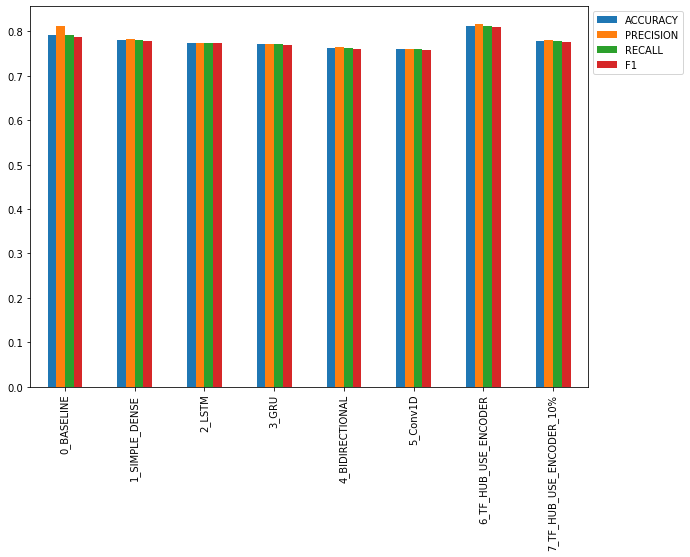

In [ ]:
# Plotting And Comparing All Of The Model Results
all_model_results.plot(kind='bar', figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

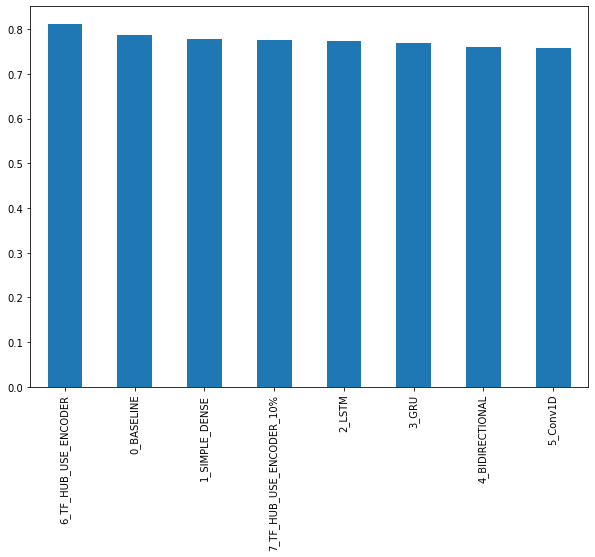

In [ ]:
# Sorting model results by F1-Score
all_model_results.sort_values('F1', ascending=False)['F1'].plot(kind='bar', figsize=(10, 7));

##UPLOADING OUR MODEL TRAINING LOGS TO tensorboard.dev

In [ ]:
# Viewing TensorBoard Logs Of Transfer Learning Modelling Experiments
# Uploading To TensorBoard dev
! tensorboard dev upload --logdir ./model_logs/ \
  --name 'NLP Modelling Experiments ZTM TF Course' \
  --description 'Comparing multiple different types of model architectures on the Kaggle Tweets Text Classficiation Dataset' \
  --one_shot 

2022-08-08 04:00:28.446849: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/q3FETRf1SoGSRrB6mOoXsQ/

[2022-08-08T04:00:28] Started scanning logdir.
[2022-08-08T04:00:35] Total uploaded: 210 scalars, 0 tensors, 7 binary objects (2.7 MB)
[2022-08-08T04:00:35] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/q3FETRf1SoGSRrB6mOoXsQ/


In [ ]:
# Seeing The Previous TensorBoard Dev Experiments
!tensorboard dev list

2022-08-08 04:05:41.421631: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
https://tensorboard.dev/experiment/q3FETRf1SoGSRrB6mOoXsQ/
	Name                 NLP Modelling Experiments ZTM TF Course
	Description          Comparing multiple different types of model architectures on the Kaggle Tweets Text Classficiation Dataset
	Id                   q3FETRf1SoGSRrB6mOoXsQ
	Created              2022-08-08 04:00:28 (5 minutes ago)
	Updated              2022-08-08 04:00:35 (5 minutes ago)
	Runs                 14
	Tags                 5
	Scalars              210
	Tensor bytes         0
	Binary object bytes  2873168
https://tensorboard.dev/experiment/6Qs88iV1SaGpJbHX23Ngpw/
	Name                 EfficientnetB0 Vs. ResNet50V2
	Description          COMPARING TWO DIFFERENT TFHub FEATURE EXTRACTION MODEL ARCHITECTURES USING 10% OF THE TRAINING DATA
	Id                   6Qs88iV1SaGpJbHX23Ngpw
	Created            

In [ ]:
!tensorboard dev delete --experiment_id 6Qs88iV1SaGpJbHX23Ngpw

2022-08-08 04:07:44.567958: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Deleted experiment 6Qs88iV1SaGpJbHX23Ngpw.


In [ ]:
!tensorboard dev delete --experiment_id q3FETRf1SoGSRrB6mOoXsQ

2022-08-08 04:08:15.655778: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Deleted experiment q3FETRf1SoGSRrB6mOoXsQ.


In [ ]:
!tensorboard dev list

2022-08-08 04:08:27.912472: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
No experiments. Use `tensorboard dev upload` to get started.


##SAVING AND LOADING A TRAINED MODEL

THE HDF5 FORMAT

In [ ]:
# Saving TF Hub Sentence Encoder Model To HDF5 Format
model_6.save('model_6.h5')

In [ ]:
# Loading The Saved Model
import tensorflow_hub as hub
loaded_model_6 = tf.keras.models.load_model('model_6.h5',
                                            custom_objects={'KerasLayer': hub.KerasLayer})

In [ ]:
# Evaluating With Loaded Model
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 2s 24ms/step - loss: 0.4324 - accuracy: 0.8123


[0.4323597252368927, 0.8123359680175781]

THE SAVEDMODEL FORMAT

In [ ]:
# Saving TF Hub Sentence Encoder Model To SavedModel Format (Default)
model_6.save('model_6_SavedModel_format')

INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


INFO:tensorflow:Assets written to: model_6_SavedModel_format/assets


In [ ]:
# Loading The Saved Model
loaded_model_6_SavedModel = tf.keras.models.load_model('/content/model_6_SavedModel_format')

In [ ]:
# Evaluating With Loaded Model
loaded_model_6_SavedModel.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 19ms/step - loss: 0.4324 - accuracy: 0.8123


[0.4323597252368927, 0.8123359680175781]

##FINDING THE MOST WRONG EXAMPLES

In [ ]:
# Downloading A PreTrained Model From Google Storage
!wget https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
!unzip 08_model_6_USE_feature_extractor.zip

--2022-08-08 04:55:50--  https://storage.googleapis.com/ztm_tf_course/08_model_6_USE_feature_extractor.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.31.128, 74.125.141.128, 173.194.210.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.31.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 960779165 (916M) [application/zip]
Saving to: ‘08_model_6_USE_feature_extractor.zip’

08_model_6_USE_feat 100%[===================>] 916.27M   149MB/s    in 7.8s    

2022-08-08 04:55:58 (118 MB/s) - ‘08_model_6_USE_feature_extractor.zip’ saved [960779165/960779165]

Archive:  08_model_6_USE_feature_extractor.zip
   creating: 08_model_6_USE_feature_extractor/
   creating: 08_model_6_USE_feature_extractor/assets/
   creating: 08_model_6_USE_feature_extractor/variables/
  inflating: 08_model_6_USE_feature_extractor/variables/variables.data-00000-of-00001  
  inflating: 08_model_6_USE_feature_extractor/variables/variables.ind

In [ ]:
# Importing The PreTrained Model
model_6_pretrained = tf.keras.models.load_model('08_model_6_USE_feature_extractor')
model_6_pretrained

In [ ]:
model_6_pretrained.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 17ms/step - loss: 0.4272 - accuracy: 0.8163


[0.42723119258880615, 0.8162729740142822]

In [ ]:
# Making Predictions With The PreTrained Model
model_6_pretrained_pred_probs = model_6_pretrained.predict(val_sentences)
model_6_pretrained_pred = tf.squeeze(tf.round(model_6_pretrained_pred_probs))
model_6_pretrained_pred[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
# Creating A DataFrame With Validation Sentences, Validation Labels And Best Performing Model Predictions Labels + Probabilities
val_df = pd.DataFrame({'text': val_sentences,
                       'target': val_labels,
                       'pred': model_6_pretrained_pred,
                       'pred_prob': tf.squeeze(model_6_pretrained_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.159757
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.747162
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.988749
3,@camilacabello97 Internally and externally scr...,1,0.0,0.196229
4,Radiation emergency #preparedness starts with ...,1,1.0,0.707808


In [ ]:
# Findinf The Wrong Precdictions And Sorting By Prediction Probabilities
most_wrong = val_df[val_df['target'] != val_df['pred']].sort_values('pred_prob', ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910196
759,FedEx will no longer transport bioterror patho...,0,1.0,0.876982
628,@noah_anyname That's where the concentration c...,0,1.0,0.852300
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.835454
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.827213
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.814816
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.810840
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.803122
119,@freefromwolves GodsLove &amp; #thankU brother...,0,1.0,0.766901
344,Air Group is here to the rescue! We have 24/7 ...,0,1.0,0.766625


In [ ]:
most_wrong.tail(10)

,text,target,pred,pred_prob
536,@DavidVonderhaar At least you were sincere ??,1,0.0,0.067303
408,@willienelson We need help! Horses will die!Pl...,1,0.0,0.055076
294,Lucas Duda is Ghost Rider. Not the Nic Cage ve...,1,0.0,0.054603
221,going to redo my nails and watch behind the sc...,1,0.0,0.054597
59,You can never escape me. Bullets don't harm me...,1,0.0,0.049637
411,@SoonerMagic_ I mean I'm a fan but I don't nee...,1,0.0,0.043918
233,I get to smoke my shit in peace,1,0.0,0.042087
38,Why are you deluged with low self-image? Take ...,1,0.0,0.038998
244,Reddit Will Now QuarantineÛ_ http://t.co/pkUA...,1,0.0,0.038949
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.037186


In [ ]:
# Checking The False Positives
for row in most_wrong[:10].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"TARGET: {target}, PRED: {pred}, PROB: {pred_prob}")
  print(f"TEXT:\n{text}\n")
  print('----\n')

TARGET: 0, PRED: 1.0, PROB: 0.9101957082748413
TEXT:
? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying

----

TARGET: 0, PRED: 1.0, PROB: 0.8769820928573608
TEXT:
FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J

----

TARGET: 0, PRED: 1.0, PROB: 0.8523001670837402
TEXT:
@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.

----

TARGET: 0, PRED: 1.0, PROB: 0.8354543447494507
TEXT:
Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0

----

TARGET: 0, PRED: 1.0, PROB: 0.8272131681442261
TEXT:
@AshGhebranious civil rights continued in the 60s. And what about trans-generational trauma? if anything we should listen to the Americans.

----

TARGET: 0, PRED: 1.0, PROB: 0.814815878868103
TEXT:
@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!

----

In [ ]:
# Checking The False Negatives
for row in most_wrong[-10:].itertuples():
  _, text, target, pred, pred_prob = row
  print(f"TARGET: {target}, PRED: {pred}, PROB: {pred_prob}")
  print(f"TEXT:\n{text}\n")
  print('----\n')

TARGET: 1, PRED: 0.0, PROB: 0.06730341911315918
TEXT:
@DavidVonderhaar At least you were sincere ??

----

TARGET: 1, PRED: 0.0, PROB: 0.05507582426071167
TEXT:
@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu

----

TARGET: 1, PRED: 0.0, PROB: 0.054603368043899536
TEXT:
Lucas Duda is Ghost Rider. Not the Nic Cage version but an actual 'engulfed in flames' badass. #Mets

----

TARGET: 1, PRED: 0.0, PROB: 0.05459702014923096
TEXT:
going to redo my nails and watch behind the scenes of desolation of smaug ayyy

----

TARGET: 1, PRED: 0.0, PROB: 0.049637287855148315
TEXT:
You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.

----

TARGET: 1, PRED: 0.0, PROB: 0.043918460607528687
TEXT:
@SoonerMagic_ I mean I'm a fan but I don't need a girl sounding off like a damn siren

----

TARGET: 1, PRED: 0.0, PROB: 0

###MAKING AND VISUALIZING PREDICTIONS ON THE TEST DATASET

In [ ]:
# Making Predictions On The test Dataset And Visualizing Them
test_sentences = test_df['text'].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_prob = tf.squeeze(model_6_pretrained.predict([test_sample]))
  pred = tf.round(pred_prob)
  print(f'PRED: {int(pred)}, PROB: {pred_prob}')
  print(f'TEXT:\n{test_sample}\n')
  print('-----\n')

PRED: 0, PROB: 0.16361933946609497
TEXT:
AMAZING ANCIENT TEXT RENDERINGS!
-------
Carl Gallups Dr. Michael Brown and Mark Biltz weigh in on this... http://t.co/sifF4ITJZ0

-----

PRED: 0, PROB: 0.2924615144729614
TEXT:
Wow that was a tough final. I barely survived ??

-----

PRED: 0, PROB: 0.27605533599853516
TEXT:
GOP Plan to Destroy Public Education - Cut Teacher Pay and Even Make Them Buy Their Own School Supplies: Pure Evil - http://t.co/WST2tWqS8D

-----

PRED: 0, PROB: 0.16746476292610168
TEXT:
The whole of New Zealand is shouting 'Bloody Marvellous'! John Campbell to join Radio NZ http://t.co/F88fCLiVzH #radionz

-----

PRED: 1, PROB: 0.7397947311401367
TEXT:
The Resistance wages guerrilla warfare against KPA forces in the Red Zone the war-torn outskirts of... http://t.co/WFxAwQvvjr

-----

PRED: 0, PROB: 0.04023280739784241
TEXT:
Need to drown in ice cream??

-----

PRED: 0, PROB: 0.11796364188194275
TEXT:
#People #Tilly the #Confused Cat Overcomes Horrible Attack to Win Hearts

##THE SPEED/SCORE TRADEOFF

In [ ]:
# Making A function To Measure The Time Of Prediction
import time
def pred_timer(model, samples):
  """
  Time Taken By A Model To Make Predictions On Samples
  """
  start_time = time.perf_counter()
  model.predict(samples)
  end_time = time.perf_counter()
  total_time = end_time - start_time
  times_per_pred = total_time/len(samples)
  return total_time, time_per_pred

In [ ]:
# Calculating TF Hub Sentence Encoder time_per_pred
model_6_total_pred_time, model_6_times_per_pred = pred_timer(model=model_6_pretrained,
                                                            samples=val_sentences)
model_6_total_pred_time, model_6_times_per_pred

(0.4448044079999818, 0.0005837328188976139)

In [ ]:
# Calculating Our baseline_model times_per_pred
baseline_total_pred_time, baseline_times_per_pred = pred_timer(model_0, val_sentences)
baseline_total_pred_time, baseline_times_per_pred

(0.06633301100009703, 8.705119553818508e-05)

In [ ]:
model_6_pretrained_results = calculate_results(y_true=val_labels,
                                               y_preds=model_6_pretrained_pred)
model_6_pretrained_results

{'ACCURACY': 81.62729658792651,
 'F1': 0.8148082644367335,
 'PRECISION': 0.818446310697231,
 'RECALL': 0.8162729658792651}

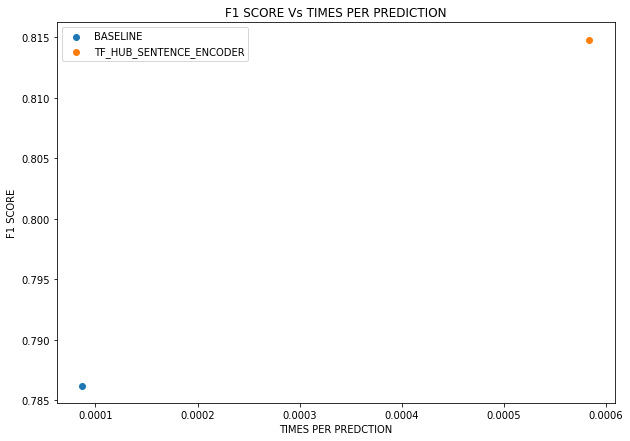

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
plt.scatter(baseline_times_per_pred, baseline_results['F1'], label='BASELINE')
plt.scatter(model_6_times_per_pred, model_6_pretrained_results['F1'], label='TF_HUB_SENTENCE_ENCODER')
plt.legend()
plt.title('F1 SCORE Vs TIMES PER PREDICTION')
plt.xlabel('TIMES PER PREDCTION')
plt.ylabel('F1 SCORE');